README: The scripts below used to build the basic pipeline of classification modeling. <br>
- manually setting threshold based on probability of each class predicted by different modeling methods, e.g., LogisticRegression(), MultiNomial(),etc.
- reformatted based on basic_pipeline_setup_v5.ipynb
- combined in usage with modeling_main.py

In [1]:
import pandas as pd
import os
os.chdir('/Users/liyuan/desktop/CSAir/codes')
import numpy as np
from collections import defaultdict

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from modeling_main import ReviewClassify

Using TensorFlow backend.


In [2]:
def predict_labels_by_threshold(model, input_data_path):
    '''get a dictionary listing the review indices that are classifies as "high-probability" by each class,
    e.g., {0:[6,15,40,..], 1:[45,3,24,..], 2..} '''
    rc = ReviewClassify(model)
    class_reviews_dct = rc.classify_reviews(input_data_path)
    print('----')
    # check if duplication exists in user reviews
    print('there are %d user reviews predicted' % sum( [len(class_reviews_dct[i]) for i in range(10)]))
    return class_reviews_dct


# have already rewrite into class
def reformat_review_label(class_reviews_dct):
    ''' re-organize predicted labels into ordered user reviews,e.g., {review0: 1, review1: 3, review2: 4, ...};
    keys are the index of each review in test set (561 examples in total, starting from 0,1,2,..etc.)'''
    d = defaultdict(list)
    for i in range(10):
        for review in class_reviews_dct[i]:
            d[review].append(i)
    print('there are only %d user reviews picked by classes after manual setting threshold' %len(d))
    reviews_picked = d.keys() 
    # print('indices of user reviews in test data that are picked after manual setting threshold:', reviews_picked)
    return d

In [5]:
# logistic regression 
class_reviews_dct_lg = predict_labels_by_threshold(LogisticRegression(),'../res/all_labeled_data.csv')
review_label_lg = self.reformat_review_label(class_reviews_dct_lg)

In [6]:
# e.g.,
print('indices of user reviews in test data that are shown as "high-probability" in class 0:')
print(class_reviews_dct_lg[0])
print('----')
# e.g.,
print('user review with index 6 in test and its associated "high-probability" labels:')
print(review_label_lg[6])

indices of user reviews in test data that are shown as "high-probability" in class 0:
[6, 15, 40, 43, 44, 62, 77, 82, 100, 107, 136, 145, 148, 150, 153, 196, 198, 199, 205, 210, 214, 221, 229, 237, 251, 266, 274, 298, 300, 319, 324, 327, 340, 345, 350, 355, 358, 382, 395, 406, 420, 444, 463, 468, 470, 472, 518, 535, 547, 558]
----
user review with index 6 in test and its associated "high-probability" labels:
[0, 1]


training data has 1139 examples
test data has 561 examples
there are 10 classes
----
there are 561 user reviews predicted
there are only 324 user reviews picked by classes after manual setting threshold
"high-prob" label predicted for the first test example: [1]


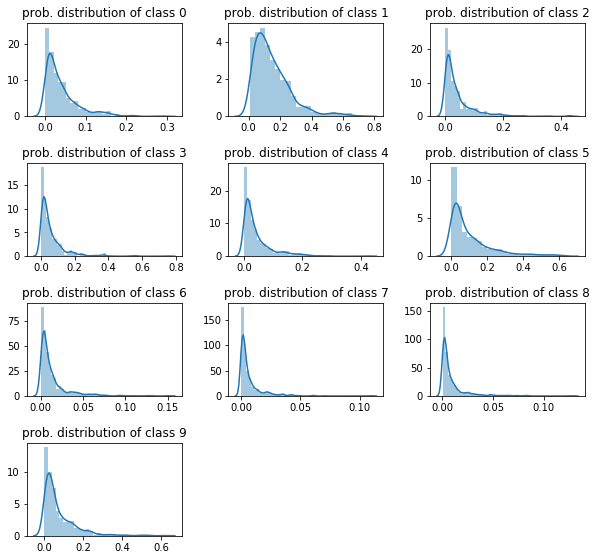

In [10]:
# MultinomialNB() 
class_reviews_dct_NB = predict_labels_by_threshold(MultinomialNB(),'../res/all_labeled_data.csv')
review_label_NB = reformat_review_label(class_reviews_dct_NB)
# e.g.,
print('"high-prob" label predicted for the first test example:',review_label_NB[0])

In [26]:
# e.g.,
print('indices of user reviews in test data that are shown as "high-probability" in class 0:')
print(class_reviews_dct_NB[0])
print('----')
# e.g.,
print('user review with index 46 in test and its associated "high-probability" labels:')
print(review_label_NB[46])

indices of user reviews in test data that are shown as "high-probability" in class 0:
[46, 54, 75, 78, 100, 107, 108, 113, 116, 118, 130, 148, 150, 163, 180, 198, 207, 209, 210, 219, 220, 221, 232, 237, 263, 269, 272, 301, 314, 319, 333, 345, 355, 357, 361, 365, 370, 377, 396, 397, 420, 429, 440, 449, 501, 529, 530, 535, 558, 560]
----
user review with index 6 in test and its associated "high-probability" labels:
[0, 1, 2, 3, 4, 5, 9]
